## Table of Contents

1. [Introduction](#section1)<br> 
2. [Importing package](#section2)<br>
3. [Importing Data](#section3)<br>
4. [Data Overview](#section4)<br>
5. [Data Correlation Matrix](#section5)<br>
6. [Prespocessing](#section51)<br>
7. [Test Train Split](#section6)<br>
8. [Modeling](#section7)<br>
    8.1. [Logistic Regression](#section71)<br>
    8.2. [Decision Tree](#section72)<br>
    8.3. [K-NN classifier](#section73)<br>
    8.4. [Support Vector MAchine (SVM)](#section74)<br>
    8.5. [Naive Bayes](#section75)<br>
9. [Comaparison for above machine learning methods](#section8)<br>

<a id=section1></a>
### Introduction
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

<a id=section2></a>
### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

list_names = []
list_accuracy = []

<a id=section3></a>
### Importing Data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Projects/gender_recognition_by_voice.csv")

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Convert "male" to 1, "female" to 0


In [4]:
temp = []
for i in data.label:
    if i == 'male':
        temp.append(1)
    else:
        temp.append(0)
data['label'] = temp

<a id=section4></a>
### Data Overview

<b>meanfreq:</b> mean frequency (in kHz)
<br/><b>sd:</b> standard deviation of frequency
<br/><b>median:</b> median frequency (in kHz)
<br/><b>Q25:</b> first quantile (in kHz)
<br/><b>Q75:</b> third quantile (in kHz)
<br/><b>IQR:</b> interquantile range (in kHz)
<br/><b>skew:</b> skewness (see note in specprop description)
<br/><b>kurt:</b> kurtosis (see note in specprop description)
<br/><b>sp.ent:</b> spectral entropy
<br/><b>sfm:</b> spectral flatness
<br/><b>mode:</b> mode frequency
<br/><b>centroid:</b> frequency centroid (see specprop)
<br/><b>peakf:</b> peak frequency (frequency with highest energy)
<br/><b>meanfun:</b> average of fundamental frequency measured across acoustic signal
<br/><b>minfun:</b> minimum fundamental frequency measured across acoustic signal
<br/><b>maxfun:</b> maximum fundamental frequency measured across acoustic signal
<br/><b>meandom:</b> average of dominant frequency measured across acoustic signal
<br/><b>mindom:</b> minimum of dominant frequency measured across acoustic signal
<br/><b>maxdom:</b> maximum of dominant frequency measured across acoustic signal
<br/><b>dfrange:</b> range of dominant frequency measured across acoustic signal
<br/><b>modindx:</b> modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
<br/><b>label:</b> male or female

<a id=section5></a>
### Data Correlation Matrix

In [5]:
#data.label = [1 if each == "male" else 0 for each in data.label]
data.head() # check if binary conversion worked

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


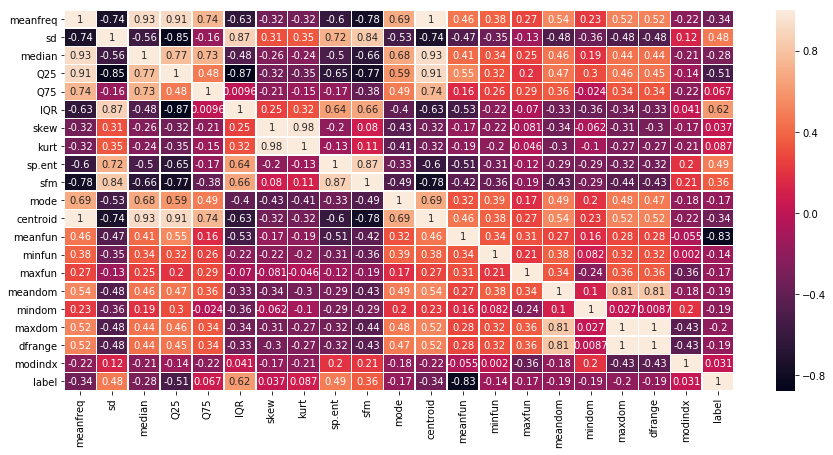

In [6]:
no_label_data = data.drop(['label'], axis = 1)
cors = data.corr()

plt.figure(figsize=(15,7))
s=sns.heatmap(cors, linewidths=.5, annot=True)
plt.show()

 
figure = s.get_figure()     
figure.savefig('CorelationMatrix.png', dpi=500, bbox_inches="tight")


1) Mean frequency is moderately related to label.

2) IQR and label tend to have a strong positive corelation.

3) Spectral entropy is also quite highly corelated with the label while sfm is moderately related with label.

4) skewness and kurtosis aren't much related with label.

5) meanfun is highly negatively corelated with the label.

6) Centroid and median have a high positive corelationas expected from their formulae.

7) ALSO NOTE THAT MEANFREQ AND CENTROID ARE EXACTLY SAME FEATURES AS PER FORMULAE AND VALUES ALSO. HENCE THEIR CORELATION IS PERFCET 1. IN THAT CASE WE CAN DROP ANY COLUMN. note that centroid in general has a high degree of corelation with most of the other features. But we will keep all columns.

8) sd is highly positively related to sfm and so is sp.ent to sd.

9) kurt and skew are also highly corelated.

10) meanfreq is highly related to medaina s well as Q25.

11) IQR is highly corelated to sd.

12) Finally self relation ie of a feature to itself is equal to 1 as expected.

Note that we can drop some highly corelated features as they add redundancy to the model but let us keep all the features for now. In case of highly corelated features we can use dimensionality reduction techniques like Principal Component Analysis(PCA) to reduce our feature space

<a id=section51></a>
### Preprocessing

In [7]:
gender = data.label.values
features = data.drop(["label"], axis = 1)
features = (features-features.min())/(features.max()-features.min()) # normalization

<a id=section6></a>
### Train test split

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, gender, test_size = 0.2, random_state = 42)

C:\Users\Shripad\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


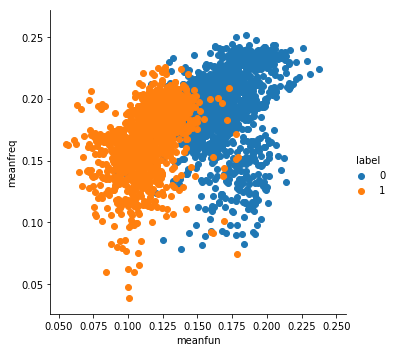

In [9]:
f= sns.FacetGrid(data, hue="label", size=5)\
   .map(plt.scatter, "meanfun", "meanfreq")\
   .add_legend()

plt.savefig('meanfun_meanfreq.png', bbox_inches='tight')

plt.show()


<a id=section7></a>

## MODELING

<a id=section71></a>
### Logistic Regression

C:\Users\Shripad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LR_accuracy is % 98.107


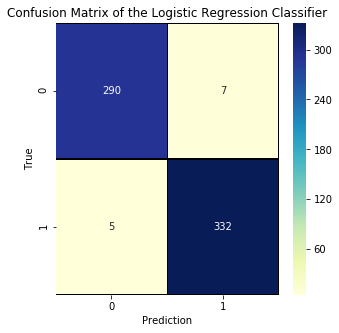

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
LR_accuracy = lr.score(x_test, y_test)*100
LR_accuracy = round(LR_accuracy, 3)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression ")
list_accuracy.append(LR_accuracy)

# Confusion Matrix
y_pred_RF = lr.predict(x_test)
RF_cm = confusion_matrix(y_test, y_pred_RF)

f, ax = plt.subplots(figsize = (5,5))
s=sns.heatmap(RF_cm, annot = True, linewidth = 0.5, linecolor = "black", fmt = ".0f", ax = ax, cmap="YlGnBu")
plt.title('Confusion Matrix of the Logistic Regression Classifier')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

figure = s.get_figure()     
figure.savefig('Confusion Matrix of the Logistic Regression Classifier.png', dpi=500, bbox_inches="tight")

<a id=section72></a>
### Decision Tree

DecisionTree_accuracy is % 96.057


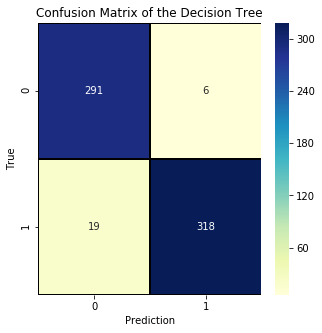

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
DecisionTree_accuracy = dt.score(x_test, y_test)*100
DecisionTree_accuracy = round(DecisionTree_accuracy,3)

print("DecisionTree_accuracy is %", DecisionTree_accuracy)

list_names.append("Decision Tree ")
list_accuracy.append(DecisionTree_accuracy)

# Confusion Matrix
y_pred_DT = dt.predict(x_test)
DT_cm = confusion_matrix(y_test, y_pred_DT)

f, ax = plt.subplots(figsize = (5,5))
s= sns.heatmap(DT_cm, annot = True, linewidth = 0.5, linecolor = "black", fmt = ".0f", ax = ax, cmap="YlGnBu")
plt.title('Confusion Matrix of the Decision Tree')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

figure = s.get_figure()     
figure.savefig('Confusion Matrix of the Decision Treer.png', dpi=500, bbox_inches="tight")


<a id=section73></a>
### K-NN CLASSIFIER

Knn_accuracy is % 98.423


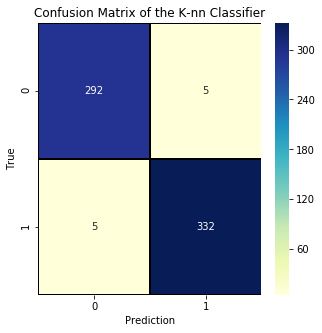

In [12]:
from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 8)
Knn.fit(x_train, y_train)
Knn_accuracy = Knn.score(x_test, y_test)*100
Knn_accuracy = round(Knn_accuracy, 3)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("K-nn ")
list_accuracy.append(Knn_accuracy)

# Confusion Matrix
y_pred_Knn = Knn.predict(x_test)
Knn_cm = confusion_matrix(y_test, y_pred_Knn)

f, ax = plt.subplots(figsize = (5,5))
s=sns.heatmap(Knn_cm, annot = True, linewidth = 0.5, linecolor = "black", fmt = ".0f", ax = ax, cmap="YlGnBu")
plt.title('Confusion Matrix of the K-nn Classifier')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()
figure = s.get_figure()     
figure.savefig('Confusion Matrix of the K-nn Classifier.png', dpi=500, bbox_inches="tight")

<a id=section74></a>
### SUPPORT VECTOR MACHINE (SVM)

C:\Users\Shripad\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM_accuracy is % 97.95


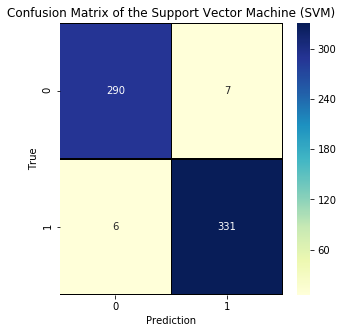

In [13]:
from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train, y_train)
SVM_accuracy = svm.score(x_test, y_test)*100
SVM_accuracy = round(SVM_accuracy, 3)

print("SVM_accuracy is %", SVM_accuracy)

list_names.append("SVM ")
list_accuracy.append(SVM_accuracy)

# Confusion Matrix
y_pred_SVM = svm.predict(x_test)
SVM_cm = confusion_matrix(y_test, y_pred_SVM)

f, ax = plt.subplots(figsize = (5,5))
s= sns.heatmap(SVM_cm, annot = True, linewidth = 0.5, linecolor = "black", fmt = ".0f", ax = ax, cmap="YlGnBu")
plt.title('Confusion Matrix of the Support Vector Machine (SVM)')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()
figure = s.get_figure()     
figure.savefig('Confusion Matrix of the Support Vector Machine (SVM).png', dpi=500, bbox_inches="tight")

<a id=section75></a>
### NAIVE BAYES

NaiveBayes_acuracy is % 90.852


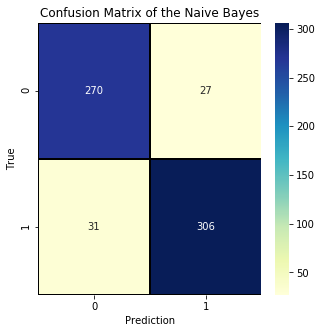

In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
NaiveBayes_acuracy = nb.score(x_test, y_test)*100
NaiveBayes_acuracy = round(NaiveBayes_acuracy,3)

print("NaiveBayes_acuracy is %", NaiveBayes_acuracy)

list_names.append("Naive Bayes ")
list_accuracy.append(NaiveBayes_acuracy)

# Confusion Matrix
y_pred_NB = nb.predict(x_test)
NB_cm = confusion_matrix(y_test, y_pred_NB)

f, ax = plt.subplots(figsize = (5,5))
s=sns.heatmap(NB_cm, annot = True, linewidth = 0.5, linecolor = "black", fmt = ".0f", ax = ax, cmap="YlGnBu")
plt.title('Confusion Matrix of the Naive Bayes')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

figure = s.get_figure()     
figure.savefig('Confusion Matrix of the Naive Bayes.png', dpi=500, bbox_inches="tight")

<a id=section8></a>
## COMPARISON for above machine learning methods

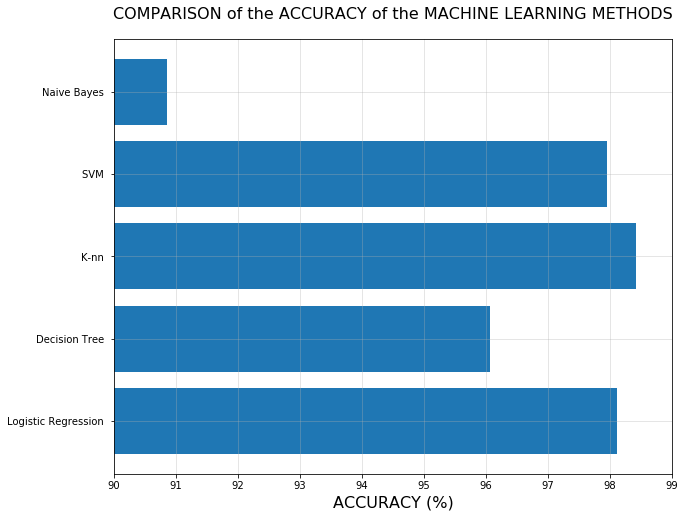

In [15]:
x = list_accuracy
y = list_names

height = list_accuracy
bars = list_names
y_pos = list_names

fig = plt.figure(figsize=(10,8))
width = 0.3 # the width of the bars
plt.title("COMPARISON of the ACCURACY of the MACHINE LEARNING METHODS", fontsize = 16, pad = 20) 
plt.xlim([90,99])
# Create horizontal bars
plt.barh(list_names, list_accuracy)
plt.grid(alpha=0.4)
plt.xlabel("ACCURACY (%)", fontsize = 16)
plt.yticks(y_pos, bars) 
plt.savefig('COMPARISON of the ACCURACY of the MACHINE LEARNING METHOD.png', bbox_inches='tight')
# Show graphic
plt.show()
